# Context aware movie recommendation engine using NLP and sentiment-based ranking to improve personalization accuracy.

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

# Define genre synonyms
genre_synonyms = {
    'Drama': ['drama', 'emotional', 'melodrama', 'tragic'],
    'Adventure': ['adventure', 'exploration', 'journey', 'quest', 'expedition'],
    'Action': ['action', 'thriller', 'fight', 'battle', 'explosion'],
    'Comedy': ['comedy', 'humor', 'funny', 'hilarious', 'laugh'],
    'Horror': ['horror', 'scary', 'fright', 'thriller', 'spooky'],
    'Biography': ['biography', 'life story', 'true story', 'based on a true story'],
    'Crime': ['crime', 'detective', 'murder', 'investigation', 'police', 'angry'],
    'Fantasy': ['fantasy', 'magical', 'mythical', 'supernatural', 'fairy tale'],
    'Family': ['family', 'kids', 'children', 'family-friendly', 'family movie'],
    'Sci-Fi': ['sci-fi', 'science fiction', 'space', 'future', 'technology'],
    'Animation': ['animation', 'cartoon', 'animated', 'animated movie', '2D animation'],
    'Romance': ['romance', 'love', 'relationship', 'romantic', 'heartfelt'],
    'Music': ['music', 'musical', 'songs', 'musical performance'],
    'Western': ['western', 'cowboys', 'ranch', 'wild west', 'gunslinger'],
    'Thriller': ['thriller', 'suspense', 'intense', 'action-packed', 'edge of seat', 'angry'],
    'History': ['history', 'historical', 'past events', 'based on history', 'periodic'],
    'Mystery': ['mystery', 'whodunit', 'suspense', 'detective', 'puzzle'],
    'Sport': ['sport', 'sports', 'competition', 'athletics', 'games'],
    'Musical': ['musical', 'musical performance', 'songs', 'dance', 'theater']
}

# Pre-process text function (remove stopwords, punctuation, and lemmatize)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    return ' '.join(tokens)

# Load movie data from CSV
df = pd.read_csv('MoviesDataset.csv')

# Apply pre-processing to all the text-based columns
df['combined_features'] = df['genre'] + " " + df['tags'] + " " + df['user_sentiment']  # You can add 'description' too

# Function to recommend movies based on user input
def recommend_movie(user_input):
    # Preprocess the user input
    user_input = preprocess_text(user_input)

    # Convert the text data into TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

    # Transform the user input into a TF-IDF vector
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate cosine similarity between user input and the movie data
    cosine_sim = cosine_similarity(user_input_vector, tfidf_matrix)

    # Get the index of the most similar movie
    similarity_scores = list(enumerate(cosine_sim[0]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 most similar movies
    recommended_movies = []
    l1 = len(similarity_scores)
    if l1>5:
        for i in range(5):
            movie_index = similarity_scores[i][0]
            movie_title = df['name'][movie_index]  # Assuming your CSV has a column named 'name'
            recommended_movies.append(movie_title)
    else:
        for i in range(l1):
            movie_index = similarity_scores[i][0]
            movie_title = df['name'][movie_index]  # Assuming your CSV has a column named 'name'
            recommended_movies.append(movie_title)

    return recommended_movies

# Function to get genre from user input (based on synonyms)
def get_genre_from_input(user_input):
    # Preprocess the user input
    user_input = preprocess_text(user_input)

    # Create a dictionary to store the matched genres
    matched_genres = defaultdict(list)

    # Check the user input against the genre synonyms
    for genre, synonyms in genre_synonyms.items():
        for synonym in synonyms:
            if synonym in user_input:
                matched_genres[genre].append(synonym)

    # Return the genre that matched the most
    if matched_genres:
        # Sort by the number of matches (most relevant genre)
        sorted_genres = sorted(matched_genres.items(), key=lambda x: len(x[1]), reverse=True)
        return sorted_genres[0][0]  # Return the genre with the most synonyms matched
    return None

# Chatbot interface
def chatbot():
    print("🎬 MovieBot: Hi! I can recommend movies. Describe what you're in the mood for (e.g., 'action with car chases', 'funny comedy', 'sci-fi adventure'). Type 'quit' to exit.")
    while True:
        user_input = input("You: ").strip().lower()

        if user_input in ["quit", "exit", "stop"]:
            print("🎬 MovieBot: Bye! Enjoy your movie time!")
            break

        genre = get_genre_from_input(user_input)
        if genre:
            print(f"🎬 MovieBot: I think you're looking for {genre} movies!")
            recommended_movies = recommend_movie(genre)
            if recommended_movies:
                print(f"🎬 MovieBot: I recommend: {', '.join(recommended_movies)}")
            else:
                print("🎬 MovieBot: Sorry, I couldn't find a matching movie. Try describing it differently!")
        else:
            print("🎬 MovieBot: Sorry, I couldn't identify the genre. Try describing it differently!")

# Run the chatbot
if __name__ == "__main__":
    chatbot()


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# df = pd.read_csv('imdb_top_2000_movies.csv')
# df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"20,02,655",Crime,Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"13,58,608",Crime,Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"3,13,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [ ]:
# def rec_mov(user_input):
#   df['combined_data'] = df["Genre"] + " " + df["Movie Name"]
#   print("count",df.count(), df.count())
#   # Create a TF-IDF Vectorizer
#   vectorizer = TfidfVectorizer(stop_words="english")
#   tfidf_matrix = vectorizer.fit_transform(df['combined_data'])
#   # print("tfidf_matrix", tfidf_matrix)


#   # Transform the user input
#   print("user_input",user_input)
#   user_vector = vectorizer.transform([user_input])
#   # print("user_vector", user_vector)
#   # Calculate cosine similarity
#   similarity_scores = cosine_similarity(user_vector, tfidf_matrix)
#   # print("Similarity Score", list(similarity_scores[0]).sort(), similarity_scores[0].argsort()[::-1][:5])
#   # Get the top 5 recommendations
#   top_indices = similarity_scores[0].argsort()
#   recommendations = df.iloc[top_indices[::-1][:5]]
#   return recommendations["Movie Name"].tolist()


# # Chatbot interface
# def chatbot():
#     print("🎬 MovieBot: Hi! I can recommend movies. Describe what you're in the mood for (e.g., 'action with car chases', 'funny comedy', 'sci-fi adventure'). Type 'quit' to exit.")
#     while True:
#         user_input = input("You: ").strip().lower()
#         if user_input in ["quit", "exit", "stop"]:
#             print("🎬 MovieBot: Bye! Enjoy your movie time!")
#             break
#         else:
#             recommendations = rec_mov(user_input)
#             if recommendations:
#                 print(f"🎬 MovieBot: I recommend: {', '.join(recommendations)}")
#             else:
#                 print("🎬 MovieBot: Sorry, I couldn't find a matching movie. Try describing it differently!")

# # Run the chatbot
# if __name__ == "__main__":
#     chatbot()


🎬 MovieBot: Hi! I can recommend movies. Describe what you're in the mood for (e.g., 'action with car chases', 'funny comedy', 'sci-fi adventure'). Type 'quit' to exit.
You: recommend drama movies
count Movie Name       2000
Release Year     2000
Duration         2000
IMDB Rating      2000
Metascore        1919
Votes            2000
Genre            2000
Director         2000
Cast             2000
Gross            1903
combined_data    2000
dtype: int64 Movie Name       2000
Release Year     2000
Duration         2000
IMDB Rating      2000
Metascore        1919
Votes            2000
Genre            2000
Director         2000
Cast             2000
Gross            1903
combined_data    2000
dtype: int64
user_input recommend drama movies
Similarity Score None [ 941  672 1190 1970  424]
🎬 MovieBot: I recommend: Ever After, Now and Then, Enough, W., Always
You: recommend crime movies
count Movie Name       2000
Release Year     2000
Duration         2000
IMDB Rating      2000
Metascore    

In [ ]:
exi!pip install FastAPI uvicorn nest_asyncio pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
# from fastapi import FastAPI
# from fastapi.responses import JSONResponse
# import uvicorn
# import nest_asyncio
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from pyngrok import ngrok

# app = FastAPI()

# df = pd.read_csv('imdb_top_2000_movies.csv')
# df['combined_data'] = df["Genre"] + " " + df["Movie Name"]

# # Create a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(stop_words="english")
# tfidf_matrix = vectorizer.fit_transform(df['combined_data'])

# @app.get("/recommend/")
# def recommend_movies(query: str):
#     user_vector = vectorizer.transform([query])
#     similarity_scores = cosine_similarity(user_vector, tfidf_matrix)
#     top_indices = similarity_scores[0].argsort()[-5:][::-1]
#     recommendations = df.iloc[top_indices]["Movie Name"].tolist()
#     return JSONResponse(content={"recommendations": recommendations})

# # Start FastAPI with ngrok
# nest_asyncio.apply()
# public_url = ngrok.connect(8000)
# print(f"Public URL: {public_url}")

# uvicorn.run(app, host="0.0.0.0", port=8000)


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

ERROR:pyngrok.process.ngrok:t=2025-02-11T15:31:00+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-11T15:31:00+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-11T15:31:00+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
# from fastapi import FastAPI
# from fastapi.responses import JSONResponse
# import uvicorn
# import nest_asyncio
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# app = FastAPI()

# df = pd.read_csv('imdb_top_2000_movies.csv')
# df['combined_data'] = df["Genre"] + " " + df["Movie Name"]

# # Create a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(stop_words="english")
# tfidf_matrix = vectorizer.fit_transform(df['combined_data'])

# @app.get("/recommend/")
# def recommend_movies(query: str):
#     user_vector = vectorizer.transform([query])
#     similarity_scores = cosine_similarity(user_vector, tfidf_matrix)
#     top_indices = similarity_scores[0].argsort()[-5:][::-1]
#     recommendations = df.iloc[top_indices]["Movie Name"].tolist()
#     return JSONResponse(content={"recommendations": recommendations})

# # Running FastAPI within Jupyter Notebook
# nest_asyncio.apply()
# uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [2554]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2554]


In [ ]:
#!pip install fastapi nest-asyncio pyngrok uvicorn
!pip install pyngrok nest_asyncio fastapi uvicorn loguru

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers faiss-cpu whoosh transformers vaderSentiment fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56

In [ ]:
# import faiss
# import numpy as np
# from sentence_transformers import SentenceTransformer
# from whoosh.index import create_in
# from whoosh.fields import Schema, TEXT
# from whoosh.qparser import QueryParser
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# from transformers import pipeline
# from fastapi import FastAPI


In [ ]:
# # Sentence-BERT for semantic search
# sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# # Sentiment Analysis Models
# vader_analyzer = SentimentIntensityAnalyzer()
# sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


Device set to use cpu


In [ ]:
# movies = pd.read_csv("imdb_top_1000.csv")
# movies = [
#     {"title": "Interstellar", "genre": ["Sci-Fi", "Adventure"],
#      "description": "A space journey exploring time and human survival."},

#     {"title": "Blade Runner 2049", "genre": ["Sci-Fi", "Action"],
#      "description": "A futuristic detective unravels a conspiracy about AI and human identity."},

#     {"title": "Mad Max: Fury Road", "genre": ["Action", "Adventure"],
#      "description": "A post-apocalyptic high-speed action thriller."},

#     {"title": "Inception", "genre": ["Sci-Fi", "Thriller"],
#      "description": "A mind-bending thriller about dreams within dreams."},

#     {"title": "Gravity", "genre": ["Sci-Fi", "Thriller"],
#      "description": "A survival story of an astronaut stranded in space."}
# ]


In [ ]:
# # Convert descriptions to embeddings
# descriptions = [movies['description']]
# # print(description)
# # for movie in movies:
# #   print(movie)

# #   description.append(movie['description'])
# # # descriptions = [movie["description"] for movie in movies]
# movie_embeddings = sbert_model.encode(descriptions)

# # Store in FAISS
# dimension = movie_embeddings.shape[1]
# faiss_index = faiss.IndexFlatL2(dimension)
# faiss_index.add(np.array(movie_embeddings))


In [ ]:
# def retrieve_similar_movies(user_query, top_k=3):
#     # Convert user query into embedding
#     query_embedding = sbert_model.encode([user_query])

#     # Retrieve top similar movies using FAISS
#     distances, indices = faiss_index.search(np.array(query_embedding), top_k)

#     return [movies[i]["title"] for i in indices[0]]


In [ ]:
# import os
# from whoosh.index import create_in
# from whoosh.fields import Schema, TEXT
# from whoosh.writing import AsyncWriter

# # Convert to string to avoid errors
# movies["title"] = movies["title"].astype(str).str.strip()
# movies["description"] = movies["description"].astype(str).str.strip()

# # Define Schema
# schema = Schema(title=TEXT(stored=True), description=TEXT(stored=True))

# # Create index directory
# if not os.path.exists("indexdir"):
#     os.mkdir("indexdir")

# # Create or open index
# ix = create_in("indexdir", schema)

# # Add movies to the Whoosh index
# with AsyncWriter(ix) as writer:
#     for _, row in movies.iterrows():
#         writer.add_document(title=row["title"], description=row["description"])

# # BM25 Search Function
# def search_bm25(query_text):
#     with ix.searcher() as searcher:
#         query = QueryParser("description", ix.schema).parse(query_text)
#         results = searcher.search(query, limit=3)
#         return [result["title"] for result in results]

In [ ]:
# def retrieve_similar_movies(user_query, top_k=3):
#     query_embedding = sbert_model.encode([user_query])
#     distances, indices = faiss_index.search(np.array(query_embedding), top_k)
#     return [movies[i]["title"] for i in indices[0]]


In [ ]:
# def analyze_sentiment(user_query):
#     vader_score = vader_analyzer.polarity_scores(user_query)
#     roberta_score = sentiment_pipeline(user_query)[0]  # RoBERTa model result

#     sentiment = "neutral"
#     if vader_score["compound"] > 0.3 and roberta_score["label"] == "positive":
#         sentiment = "positive"
#     elif vader_score["compound"] < -0.3 and roberta_score["label"] == "negative":
#         sentiment = "negative"

#     return sentiment


In [ ]:
# def filter_recommendations(sentiment, movie_list):
#     if sentiment == "negative":
#         print("User seems unhappy. Avoid slow-paced movies.")
#         return [m for m in movie_list if m != "Blade Runner 2049"]
#     return movie_list


In [ ]:
# def recommend_movies(query: str):
#     # Step 1: Retrieve movies
#     faiss_results = retrieve_similar_movies(query)
#     bm25_results = search_bm25(query)

#     # Step 2: Merge results
#     final_recommendations = list(set(faiss_results + bm25_results))

#     # Step 3: Sentiment analysis
#     sentiment = analyze_sentiment(query)

#     # Step 4: Filter based on sentiment
#     final_recommendations = filter_recommendations(sentiment, final_recommendations)

#     return {"recommendations": final_recommendations, "sentiment": sentiment}

In [ ]:
# query = input("Enter your query: ")
# recommend_movies(query)

Enter your query: suggest movie like batman


KeyError: 0

In [ ]:
# import requests
# from transformers import pipeline
# from sentence_transformers import SentenceTransformer, util
# import random

# # Load sentiment analysis model
# sentiment_analyzer = pipeline("sentiment-analysis")

# # Load aspect-based embedding model
# embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# # TMDB API Key (Replace with your own)
# TMDB_API_KEY = "YOUR_TMDB_API_KEY"

# # Aspect-Based Keywords for Movie Genres
# genre_keywords = {
#     "thriller": ["thriller", "suspense", "mystery"],
#     "comedy": ["comedy", "funny", "humor"],
#     "sci-fi": ["sci-fi", "science fiction", "space"],
#     "romantic": ["romantic", "love", "relationship"],
#     "animated": ["animated", "cartoon", "family"],
#     "action": ["action", "adventure", "superhero"],
#     "drama": ["drama", "emotional", "deep"],
#     "horror": ["horror", "scary", "ghost"]
# }

# # Mood-Based Recommendations
# positive_movies = ["Inception", "Interstellar", "La La Land", "The Grand Budapest Hotel"]
# negative_movies = ["Inside Out", "The Pursuit of Happyness", "The Shawshank Redemption"]
# neutral_movies = ["Titanic", "Forrest Gump"]

# # Function to Extract Aspects
# def extract_aspect(user_input):
#     """Identify the movie genre preference from user input."""
#     for genre, keywords in genre_keywords.items():
#         if any(word in user_input.lower() for word in keywords):
#             return genre
#     return None

# # Function to Fetch Movies from TMDB
# def fetch_movies_from_tmdb(genre):
#     """Fetch trending movies of a specific genre from TMDB API."""
#     genre_map = {
#         "thriller": 53, "comedy": 35, "sci-fi": 878, "romantic": 10749,
#         "animated": 16, "action": 28, "drama": 18, "horror": 27
#     }
#     genre_id = genre_map.get(genre, 18)  # Default to drama if not found
#     url = f"https://api.themoviedb.org/3/discover/movie?api_key={TMDB_API_KEY}&with_genres={genre_id}"

#     response = requests.get(url)
#     data = response.json()

#     movies = [movie["title"] for movie in data.get("results", [])[:5]]
#     return movies if movies else ["No movie found"]

# # Function to Recommend Movie
# def recommend_movie(user_input):
#     """Recommend a movie based on sentiment & aspect analysis."""
#     sentiment, _ = sentiment_analyzer(user_input)[0].values()
#     aspect = extract_aspect(user_input)

#     if aspect:  # If user specifies a genre
#         movies = fetch_movies_from_tmdb(aspect)
#         return f"Since you like **{aspect}** movies, I recommend: **{random.choice(movies)}**!"

#     else:  # If no genre is specified, recommend based on mood
#         if sentiment == "POSITIVE":
#             recommendation = random.choice(positive_movies)
#         elif sentiment == "NEGATIVE":
#             recommendation = random.choice(negative_movies)
#         else:
#             recommendation = random.choice(neutral_movies)

#         return f"Since you're feeling {sentiment.lower()}, you might enjoy: **{recommendation}**!"

# # Example User Queries
# print(recommend_movie("I love sci-fi movies!"))  # Genre-based
# print(recommend_movie("I'm feeling really down today..."))  # Mood-based
# print(recommend_movie("Suggest me a movie"))  # Mood-based


KeyboardInterrupt: 

In [ ]:
print(recommend_movie("I hate sci-fi movies"))

Based on your interest, I recommend: **Interstellar**!


## ABSA SAMPLE CODE

In [ ]:
!pip install transformers sentence-transformers spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# import spacy
# from transformers import pipeline
# import random

# # Load SpaCy NLP model
# nlp = spacy.load("en_core_web_sm")

# # Load sentiment analysis model
# sentiment_analyzer = pipeline("sentiment-analysis")

# # Predefined movie dataset categorized by genre
# movie_database = {
#     "thriller": ["Inception", "Se7en", "Gone Girl", "Shutter Island"],
#     "comedy": ["Superbad", "Step Brothers", "The Hangover", "Dumb and Dumber"],
#     "sci-fi": ["Interstellar", "The Matrix", "Blade Runner 2049", "Dune"],
#     "romantic": ["La La Land", "Titanic", "Pride and Prejudice", "The Notebook"],
#     "animated": ["Toy Story", "Inside Out", "Coco", "Shrek"],
#     "action": ["Mad Max: Fury Road", "Gladiator", "John Wick", "The Dark Knight"],
#     "drama": ["The Shawshank Redemption", "Forrest Gump", "A Beautiful Mind", "Whiplash"],
#     "horror": ["The Conjuring", "It", "A Quiet Place", "The Exorcist"]
# }

# # Predefined mood-boosting movies
# mood_movies = {
#     "positive": ["Inception", "Interstellar", "La La Land", "The Grand Budapest Hotel"],
#     "negative": ["Inside Out", "The Pursuit of Happyness", "The Shawshank Redemption"],
#     "neutral": ["Titanic", "Forrest Gump"]
# }

# # Aspect-Based Keywords for Movie Genres
# genre_keywords = {
#     "thriller": ["thriller", "suspense", "mystery"],
#     "comedy": ["comedy", "funny", "humor"],
#     "sci-fi": ["sci-fi", "science fiction", "space"],
#     "romantic": ["romantic", "love", "relationship"],
#     "animated": ["animated", "cartoon", "family"],
#     "action": ["action", "adventure", "superhero"],
#     "drama": ["drama", "emotional", "deep"],
#     "horror": ["horror", "scary", "ghost"]
# }


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# def extract_aspect(user_input):
#     """Extract movie genre aspect from user input using SpaCy NLP."""
#     doc = nlp(user_input)
#     for token in doc:
#         for genre, keywords in genre_keywords.items():
#             if token.text.lower() in keywords:
#                 return genre
#     return None


In [ ]:
# def analyze_sentiment(text):
#     """Perform sentiment analysis on the user query."""
#     sentiment_result = sentiment_analyzer(text)[0]
#     return sentiment_result["label"]


In [ ]:
# def recommend_movie(user_input):
#     """Recommend a movie based on aspect and sentiment analysis."""
#     aspect = extract_aspect(user_input)
#     sentiment = analyze_sentiment(user_input)

#     if aspect:  # If user specifies a genre
#         movies = movie_database.get(aspect, ["No movie found"])
#         return f"Since you like **{aspect}** movies, I recommend: **{random.choice(movies)}**!"

#     else:  # If no genre is specified, recommend based on mood
#         if sentiment == "POSITIVE":
#             recommendation = random.choice(positive_movies)
#         elif sentiment == "NEGATIVE":
#             recommendation = random.choice(negative_movies)
#         else:
#             recommendation = random.choice(neutral_movies)

#         return f"Since you're feeling {sentiment.lower()}, you might enjoy: **{recommendation}**!"


In [ ]:
# # Example Queries
# print(recommend_movie("I love sci-fi movies!"))  # Genre-based recommendation
# print(recommend_movie("I'm feeling really down today..."))  # Mood-based recommendation
# print(recommend_movie("Recommend me a good movie"))  # Sentiment-based recommendation


Since you like **romantic** movies, I recommend: **Pride and Prejudice**!
Since you're feeling negative, you might enjoy: **The Pursuit of Happyness**!
Since you're feeling positive, you might enjoy: **Inception**!


In [ ]:
# print(recommend_movie("I want to watch sci-fi movies"))  # Genre-based recommendation


Since you're feeling positive, you might enjoy: **Inception**!


In [ ]:
# import pandas as pd
# from transformers import pipeline

# # Step 1: Load the movie data from the CSV
# def load_movie_data():
#     # Assuming you have a CSV file with movie data
#     df = pd.read_csv('imdb_top_1000.csv')
#     return df

# # Step 2: Perform sentiment analysis using Hugging Face's DistilBERT model
# def analyze_sentiment(user_input):
#     # Initialize the sentiment-analysis pipeline with a pre-trained DistilBERT model
#     sentiment_analyzer = pipeline('sentiment-analysis')

#     # Get sentiment score for user input
#     result = sentiment_analyzer(user_input)

#     # Extract sentiment label (positive or negative) and the confidence score
#     sentiment_label = result[0]['label']

#     return sentiment_label

# # Step 3: Map sentiment to mood categories
# def get_sentiment_category(sentiment_label):
#     if sentiment_label == 'POSITIVE':
#         return 'positive'
#     elif sentiment_label == 'NEGATIVE':
#         return 'negative'
#     else:
#         return 'neutral'

# # Step 4: Filter movies based on the sentiment
# def recommend_movies(df, sentiment_category):
#     # Filter movies based on sentiment
#     if sentiment_category == 'positive':
#         # Recommend uplifting or feel-good genres (e.g., Comedy, Drama, Adventure)
#         filtered_movies = df[df['Genre'].str.contains('Comedy|Drama|Adventure', case=False, na=False)]
#     elif sentiment_category == 'negative':
#         # Recommend dark, complex genres (e.g., Thriller, Crime, Drama)
#         filtered_movies = df[df['Genre'].str.contains('Thriller|Crime|Drama', case=False, na=False)]
#     else:
#         # Recommend a balanced set of genres for neutral sentiment
#         filtered_movies = df.sample(10)  # Get a random selection for neutrality

#     return filtered_movies[['Series_Title', 'Genre', 'Overview']][:5]

# # Step 5: Main Function to Drive the Process
# def movie_recommendation_system():
#     # Load movie data
#     df = load_movie_data()

#     # Ask the user for input
#     user_input = input("How are you feeling today? (Describe your mood): ")

#     # Analyze sentiment using the latest model (DistilBERT)
#     sentiment_label = analyze_sentiment(user_input)
#     sentiment_category = get_sentiment_category(sentiment_label)

#     print(f"Your sentiment: {sentiment_category.capitalize()}")

#     # Recommend movies based on sentiment
#     recommendations = recommend_movies(df, sentiment_category)

#     # Display the movie recommendations
#     print("\nHere are some movie recommendations for you:\n")
#     for index, row in recommendations.iterrows():
#         print(f"Title: {row['Series_Title']}")
#         print(f"Genre: {row['Genre']}")
#         print(f"Description: {row['Overview']}")
#         print("-" * 40)

# # Run the system
# if __name__ == "__main__":
#     movie_recommendation_system()




How are you feeling today? (Describe your mood): I am angry


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Your sentiment: Negative

Here are some movie recommendations for you:

Title: The Shawshank Redemption
Genre: Drama
Description: Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.
----------------------------------------
Title: The Godfather
Genre: Crime, Drama
Description: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
----------------------------------------
Title: The Dark Knight
Genre: Action, Crime, Drama
Description: When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
----------------------------------------
Title: The Godfather: Part II
Genre: Crime, Drama
Description: The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the famil

### Emotion Analysis

In [ ]:
from transformers import pipeline
user_input = input("Enter your query: ")
classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion")
classification = classifier(user_input)[0]
emotion = classification['label']
print(emotion)

Enter your query: 


config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


anger


In [ ]:
 import pandas as pd
 df = pd.read_csv('MoviesDataset.csv')
 df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,description,tags,user_sentiment
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"The Shining, directed by Stanley Kubrick, is a...","Psychological Horror, Supernatural, Haunting, ...","Terrified, Paranoid, Uneasy, Haunted"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,The Blue Lagoon is an exhilarating adventure f...,"Romantic Drama, Survival, Coming-of-Age, Nature","Dreamy, Melancholic, Reflective, Isolated"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Star Wars: Episode V - The Empire Strikes Back...,"Sci-Fi, Epic, Adventure, Heroic, Space Opera","Excited, Inspired, In Awe, Adventurous"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"Airplane!, directed by Jim Abrahams, is a hila...","Parody, Slapstick, Satire, Absurd Comedy","Hilarious, Entertained, Lighthearted, Nostalgic"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"Caddyshack, directed by Harold Ramis, is a hil...","Sports Comedy, Slapstick, Golf, Classic","Amused, Relaxed, Cheerful, Entertained"


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from transformers import pipeline
import numpy as np

# Load the dataset
df = pd.read_csv('MoviesDataset.csv')

# Sentiment Analysis using Hugging Face Transformer
# sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
# sentiments = [sentiment_analyzer(desc)[0] for desc in df['description']]
# df['polarity'] = [s['score'] if s['label'] == 'POSITIVE' else -s['score'] for s in sentiments]
# df['subjectivity'] = np.random.uniform(0.3, 0.8, len(df))  # Simulated subjectivity scores
rating_mapping = {"G": 1, "PG": 2, "PG-13": 3, "R": 4, "NC-17": 5}
df['rating'] = df['rating'].map(rating_mapping)
# Fill NaN values in rating column with a default value (e.g., median)
df['rating'] = df['rating'].fillna(df['rating'].median(), inplace=True)
# df['polarity'] = df['polarity'].fillna(df['polarity'].median(), inplace=True)
# df['subjectivity'] = df['subjectivity'].fillna(df['subjectivity'].median(), inplace=True)

# Selecting features for clustering
features = ['tags', 'user_sentiment', 'runtime', 'votes', 'rating']
df_features = df[features]
# df_features.isnull().sum()
print(df_features.isnull().sum())
df_features = df_features.fillna(0)
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Finding optimal k using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(k_range), y=inertia, mode='lines+markers', marker=dict(size=8)))
fig.update_layout(title='Elbow Method for Optimal k', xaxis_title='Number of Clusters', yaxis_title='Inertia (WCSS)')
fig.show()

# Applying K-Means with k=3 (as per elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(df_scaled)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

# Scatter plot of clusters with Plotly
fig = px.scatter(df, x='pca1', y='pca2', color=df['cluster'].astype(str),
                 hover_data=['name'], title='K-Means Clusters (PCA Reduced)')
fig.show()


tags                 1
user_sentiment       1
runtime              6
votes                7
rating            8315
dtype: int64


<ipython-input-59-2e1eb7d47700>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'] = df['rating'].fillna(df['rating'].median(), inplace=True)
<ipython-input-59-2e1eb7d47700>:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features = df_features.fillna(0)


ValueError: could not convert string to float: 'Psychological Horror, Supernatural, Haunting, Disturbing'

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from transformers import pipeline
import numpy as np
import pandas as pd

df = pd.read_csv('MoviesDataset.csv')

# Load BERT sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Apply sentiment analysis

df["bert_sentiment"] = df["description"].astype(str).apply(lambda x: int(sentiment_pipeline(x)[0]["label"][0]) if x else 3)  # Default to neutral (3)



Device set to use cuda:0


In [ ]:
# df['votes'] = df['votes'].fillna(df['votes'].median(), inplace=True)
# df['rating'] = df['rating'].fillna(df['rating'].median(), inplace=True)

# rating_mapping = {"G": 1, "PG": 2, "PG-13": 3, "R": 4, "NC-17": 5}
# df['rating'] = df['rating'].map(rating_mapping)
df['rating'] = df['rating'].str.strip().str.upper()

# Define the mapping dictionary
# rating_mapping = {"G": 1, "PG": 2, "PG-13": 3, "R": 4, "NC-17": 5}

# Define the function to map ratings to numbers
def rating_to_num(rating):
    mapping = {"G": 1, "PG": 2, "PG-13": 3, "R": 4, "NC-17": 5}
    return mapping.get(rating,0)  # Return the number or 0 if not found

# Apply the function to the 'rating' column
df['rating'] = df['rating'].apply(rating_to_num)
print(df['rating'].unique())



[4 2 1 0 5 3]


In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Select features for clustering
features = df[["bert_sentiment","rating"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# # Reduce dimensions using UMAP
# umap = UMAP(n_components=2, random_state=42)
# features_umap = umap.fit_transform(scaled_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
df["cluster"] = kmeans.fit_predict(scaled_features)

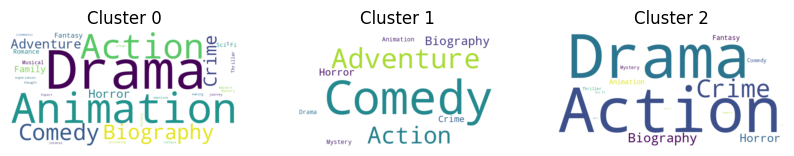

In [ ]:
plt.figure(figsize=(10, 5))
for cluster in df["cluster"].unique():
    cluster_genres = " ".join(df[df["cluster"] == cluster]["genre"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cluster_genres)

    plt.subplot(1, 3, cluster + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster}")

plt.show()


In [ ]:
sorted_movies = df.sort_values(by=["cluster", "bert_sentiment"], ascending=[True, False])[["cluster", "name"]]
print(sorted_movies)


      cluster                                               name
60          0                                Herbie Goes Bananas
75          0                      The Last Flight of Noah's Ark
102         0                                           Das Boot
120         0                                 Tarzan the Ape Man
148         0                             The Great Muppet Caper
...       ...                                                ...
7142        2                                         Downsizing
7631        2       The Least of These: The Graham Staines Story
7789        2                                         Downsizing
8278        2       The Least of These: The Graham Staines Story
6594        2  Alexander and the Terrible, Horrible, No Good,...

[8315 rows x 2 columns]


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb(movie_name):
    search_url = f"https://www.imdb.com/find?q={movie_name.replace(' ', '+')}"
    headers = {"User-Agent": "Mozilla/5.0"}

    # Fetch search page
    search_page = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(search_page.text, "html.parser")

    # Extract first result link (with improved error handling)
    try:
        # Check if there are results
        results = soup.select(".findResult .result_text a")
        if not results:
            return {"error": "No search results found."}

        # Extract the first result's link
        first_result = results[0]
        movie_url = f"https://www.imdb.com{first_result['href']}"

        # Fetch movie page
        movie_page = requests.get(movie_url, headers=headers)
        movie_soup = BeautifulSoup(movie_page.text, "html.parser")

        # Extract details
        title = movie_soup.find("h1").text.strip()
        rating = movie_soup.select_one("span.sc-7ab21ed2-1").text.strip() if movie_soup.select_one("span.sc-7ab21ed2-1") else "No Rating"
        summary = movie_soup.select_one(".sc-16ede01-0").text.strip() if movie_soup.select_one(".sc-16ede01-0") else "No Summary Available"

        return {"title": title, "rating": rating, "summary": summary}

    except Exception as e:
        return {"error": f"Could not retrieve details: {e}"}

# Example usage
movie_details = scrape_imdb("The Shining")
print(movie_details)


{'error': 'Could not retrieve details: list index out of range'}


In [ ]:
# from transformers import pipeline
# classifier = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)
# prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
# print(prediction)

In [ ]:
!pip install sentence-transformers faiss-cpu whoosh transformers vaderSentiment fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
from fastapi import FastAPI
from fastapi.responses import JSONResponse
import uvicorn
import nest_asyncio
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline


app = FastAPI()

df = pd.read_csv('MoviesDataset.csv')

def find_columns_with_different_words(df, query_word):
    different_columns = []
    for col in df.columns:
        unique_words = set(df[col].str.split().explode())  # Split words and get unique values
        if any(word != query_word for word in unique_words):  # Check if different words exist
            different_columns.append(col)
    return different_columns


# @app.get("/recommend/")
def recommend_movies(query: str):
    classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion")
    classification = classifier(query)[0]
    emotion = classification['label']
    result = find_columns_with_different_words(df, emotion)
    # user_vector = vectorizer.transform([query])
    # similarity_scores = cosine_similarity(user_vector, tfidf_matrix)
    # top_indices = similarity_scores[0].argsort()
    # recommendations = df.iloc[top_indices[::-1][:3]]["Movie Name"].tolist()
    print("recommendations",result)
    return JSONResponse(content={"recommendations": result})

# Running FastAPI within Jupyter Notebook
# nest_asyncio.apply()
# uvicorn.run(app, host="127.0.0.1", port=8000)

In [ ]:
recommend_movies("I like to watch horror movies")

Device set to use cpu


AttributeError: Can only use .str accessor with string values!

In [ ]:
# def extract_text_values(data):
#     text_values = []

#     if isinstance(data, dict):
#         for key, value in data.items():
#             if key == "text":
#                 text_values.append(value)  # Store the "text" value
#             # else:
#             #     text_values.extend(extract_text_values(value))  # Recursively search
#     # elif isinstance(data, list):
#     #     for item in data:
#     #         text_values.extend(extract_text_values(item))  # Recursively search

#     return text_values

In [ ]:
import requests
import json

def recommend_movies(emotion):


    url = "https://caching.graphql.imdb.com/"

    dict1 = {'sadness': 'Drama',
            'joy': 'Comedy',
            'love': 'Romance',
            'anger': 'Action',
            'fear': 'Horror',
            'surprise':'Mystery'}
    print(dict1[emotion])

    payload = json.dumps({
      "operationName": "AdvancedTitleSearch",
      "variables": {
        "first": 50,
        "genreConstraint": {
          "allGenreIds": [
            dict1[emotion]
          ]
        },
        "locale": "en-US",
        "sortBy": "POPULARITY",
        "sortOrder": "ASC"
      },
      "extensions": {
        "persistedQuery": {
          "sha256Hash": "6842af47c3f1c43431ae23d394f3aa05ab840146b146a2666d4aa0dc346dc482",
          "version": 1
        }
      }
    })
    headers = {
      'Content-Type': 'application/json'
    }


    response = requests.request("POST", url, headers=headers, data=payload)
    res = response.text

    res_dict = json.loads(res)  # Convert JSON string to dictionary
    res_dict_d1 = res_dict['data']['advancedTitleSearch']['edges']

    # Extract all "text" values
    final_res = []
    for i in range(10):
      final_res.append(res_dict_d1[i]['node']['title']['titleText']['text'])

      # text_values = extract_text_values(res_dict_d1[i]['node']['title']['titleText']['text'])
      # print(text_values)
    # for item in res_dict_d1():
    #   text_values = extract_text_values(item)

    # print("Helloooo", dict(res_dict['data']['advancedTitleSearch']['edges'][0]['node']))
    return final_res
    # print(response.text)

In [ ]:
# import requests

# from bs4 import BeautifulSoup

# # url =

# def recommend_movies(emotion):

#     urls = {

#         "happy": "https://www.imdb.com/search/title/?genres=comedy",

#         "sad": "https://www.imdb.com/search/title/?genres=drama",

#         "anger": "https://www.imdb.com/search/title/?genres=action",

#         "fear": "https://www.imdb.com/search/title/?genres=horror",

#         "surprise": "https://www.imdb.com/search/title/?genres=mystery",

#         "joy": "https://www.imdb.com/search/title/?genres=comedy",

#         "comedy": "https://www.imdb.com/search/title/?genres=comedy",

#         "love": "https://www.imdb.com/search/title/?genres=romance",


#     }



#     if emotion not in urls:

#         return "No movie recommendations available for this mood."



#     response = requests.get(urls[emotion], headers={"User-Agent": "Mozilla/5.0"})
#     print("response", response)

#     soup = BeautifulSoup(response.text, 'html.parser')
#     print(soup)

#     movie_titles = [tag.text.strip() for tag in soup.select("h3.lister-item-header a")[:5]]



#     return movie_titles

In [ ]:
from transformers import pipeline
user_input = input("Enter your query: ")
classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion")
classification = classifier(user_input)[0]
emotion = classification['label']
print(emotion)
print("O/P",recommend_movies(emotion))

Enter your query: i want to watch romantic movies


Device set to use cuda:0


love
Romance
O/P ['The Gorge', 'Bridget Jones: Mad About the Boy', 'Anora', 'La Dolce Villa', 'The Jewel of Section E', 'Babygirl', 'Wicked', "Grey's Anatomy", 'Sweet Magnolias', 'Younger']


## Emotion Detection from Scratch:

In [ ]:
import pandas as pd

with open('merged_training.pkl', 'rb') as f:
    df = pd.read_pickle(f)
print(df.head(),'\n')
print("Types of Emotions",df['emotions'].unique())


                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love 

Types of Emotions ['sadness' 'joy' 'love' 'anger' 'fear' 'surprise']


In [ ]:
print(df.describe())

                                                 text emotions
count                                          416809   416809
unique                                         393822        6
top     i feel more adventurous willing to take risks      joy
freq                                               16   141067


In [ ]:
print(df.isnull().sum())

text        0
emotions    0
dtype: int64


In [ ]:
# Preprocessing

emotion_map = {'sadness': 0, 'joy': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}
df['emotions_map'] = df['emotions'].map(emotion_map)
# df.head(20)


# Tokenizing
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the texts
texts = df['text'].tolist()
encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Creating a Dataset Class

import torch
from torch.utils.data import Dataset

class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

numeric_labels = df['emotions_map'].tolist()

# Split the data into train and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, numeric_labels, test_size=0.2)

# Tokenize the train and validation texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Create datasets
train_dataset = EmotionDataset(train_encodings, train_labels)
val_dataset = EmotionDataset(val_encodings, val_labels)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8)


In [ ]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW
from tqdm import tqdm

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
model.train()  # Set model to training mode
for epoch in range(3):  # Train for 3 epochs
    loop = tqdm(train_dataloader, leave=True)
    for batch in loop:
        optimizer.zero_grad()

        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()

        loop.set_description(f'Epoch {epoch+1}')
        loop.set_postfix(loss=loss.item())


Epoch 1:   0%|          | 6/41681 [00:35<66:18:34,  5.73s/it, loss=1.74]

In [ ]:
  model.eval()  # Set model to evaluation mode

correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get predictions
        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

accuracy = correct_predictions / total_predictions
print(f"Validation Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report

# After training loop, during validation:
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(batch["labels"].cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_mapping.keys()))

# Call this after training:
evaluate_model(model, val_loader)



In [ ]:
def predict_emotion(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    # Get model prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_label = torch.argmax(logits, dim=1).item()

    # Map numeric label back to emotion
    reverse_emotion_map = {v: k for k, v in emotion_map.items()}
    return reverse_emotion_map[predicted_label]

# Test inference
test_text = "I'm feeling so excited and happy!"
predicted_emotion = predict_emotion(test_text)
print(f"Predicted Emotion: {predicted_emotion}")


In [ ]:
# import torch
# from torch.utils.data import Dataset
# from transformers import BertTokenizer

# class MoodDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_length):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         label = self.labels[idx]
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_length,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt',
#         )
#         return {
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.long)
#         }


In [ ]:
!pip install transformers

In [ ]:
import torch
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base", cache_dir="./model_cache")


# Load dataset from pkl file
def load_data(pkl_file):
    return pd.read_pickle(pkl_file)

dataset = load_data("merged_training.pkl")

# Ensure dataset is a DataFrame
if not isinstance(dataset, pd.DataFrame):
    raise TypeError("Dataset is not a pandas DataFrame")

# Load tokenizer
# tokenizer = DistilBertTokenizer.from_pretrained("distilroberta-base")
tokenizer = DistilBertTokenizer.from_pretrained("./model_cache/distilroberta-base")

def tokenize_function(texts):
    return tokenizer(list(texts), padding="max_length", truncation=True, return_tensors="pt")

# Tokenize dataset
tokenized_data = tokenize_function(dataset["text"])  # Assuming 'text' column exists
labels = torch.tensor(dataset["labels"].tolist())  # Assuming 'labels' column exists

# Convert to dictionary format
tokenized_datasets = {
    "input_ids": tokenized_data["input_ids"],
    "attention_mask": tokenized_data["attention_mask"],
    "labels": labels,
}

# Load model
model = DistilBertForSequenceClassification.from_pretrained("distilroberta-base", num_labels=len(set(labels.tolist())))

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
)

# Train model
trainer.train()

# Save the trained model
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

# Function for mood prediction
def analyze_mood(text):
    model = DistilBertForSequenceClassification.from_pretrained("./saved_model")
    tokenizer = DistilBertTokenizer.from_pretrained("./saved_model")
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

if __name__ == "__main__":
    text = input("Enter text to analyze mood: ")
    mood = analyze_mood(text)
    print("Detected Mood ID:", mood)

OSError: Incorrect path_or_model_id: './model_cache/distilroberta-base'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from torch.optim import AdamW


# 1. Load and preprocess the dataset
def load_and_preprocess_data(filepath):
    with open('merged_training.pkl', 'rb') as f:
      df = pd.read_pickle(f)
    # pd.read_pickle(pkl_file)
    # df = pd.read_csv(filepath)
    texts = df['text'].tolist()
    emotions = df['emotions'].tolist()

    # Encode emotions
    label_encoder = LabelEncoder()
    encoded_emotions = label_encoder.fit_transform(emotions)

    return texts, encoded_emotions, len(label_encoder.classes_), label_encoder

# 2. Tokenize the text
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'][0])
        attention_masks.append(encoded['attention_mask'][0])

    input_ids = tf.stack(input_ids)
    attention_masks = tf.stack(attention_masks)
    return input_ids, attention_masks

# 3. Build and compile the model
def build_and_compile_model(num_labels, learning_rate=2e-5):
    model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# 4. Train the model
def train_model(model, input_ids_train, attention_masks_train, emotions_train, input_ids_val, attention_masks_val, emotions_val, epochs=3, batch_size=32):
    model.fit(
        [input_ids_train, attention_masks_train],
        emotions_train,
        validation_data=([input_ids_val, attention_masks_val], emotions_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return model

# 5. Save the model and label encoder
def save_model_and_encoder(model, label_encoder, save_path="mood_analyzer"):
    model.save_pretrained(save_path)
    import pickle
    with open(f"{save_path}/label_encoder.pkl", "wb") as f:
        pickle.dump(label_encoder, f)

# 6. Load the model and label encoder
def load_model_and_encoder(load_path="mood_analyzer"):
    model = TFDistilBertForSequenceClassification.from_pretrained(load_path)
    import pickle
    with open(f"{load_path}/label_encoder.pkl", "rb") as f:
        label_encoder = pickle.load(f)
    return model, label_encoder

# 7. Predict emotions
def predict_emotion(text, model, tokenizer, label_encoder, max_length=128):
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )
    input_ids = encoded['input_ids']
    attention_masks = encoded['attention_mask']

    predictions = model([input_ids, attention_masks])[0]
    predicted_label = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_emotion = label_encoder.inverse_transform([predicted_label])[0]
    return predicted_emotion

# Main execution
if __name__ == "__main__":
    filepath = "merged_training.pkl"  # Replace with your dataset file path
    texts, encoded_emotions, num_labels, label_encoder = load_and_preprocess_data(filepath)

    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    input_ids, attention_masks = tokenize_data(texts, tokenizer)

    input_ids_train, input_ids_val, emotions_train, emotions_val = train_test_split(
        input_ids, encoded_emotions, test_size=0.2, random_state=42
    )
    attention_masks_train, attention_masks_val, _, _ = train_test_split(
        attention_masks, encoded_emotions, test_size=0.2, random_state=42
    )

    model = build_and_compile_model(num_labels)
    trained_model = train_model(model, input_ids_train, attention_masks_train, emotions_train, input_ids_val, attention_masks_val, emotions_val)

    save_model_and_encoder(trained_model, label_encoder)

    # Example of loading and prediction
    loaded_model, loaded_label_encoder = load_model_and_encoder()
    example_text = "I'm feeling very happy today!"
    predicted_emotion = predict_emotion(example_text, loaded_model, tokenizer, loaded_label_encoder)
    print(f"Predicted emotion: {predicted_emotion}")

## DISTILBERT AND LORA

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from peft import LoraConfig, get_peft_model
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
from torch.optim import AdamW



# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
file_path = "merged_training.pkl"  # Ensure your dataset file is in the same directory
df = pd.read_pickle(file_path)

# Clean label column
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(label_mapping)
# Adjust the number of samples to 12000 with equal distribution
num_samples_per_label = 12000 // len(label_mapping)

# Create a balanced dataset with 1200 samples
balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)

# Verify the distribution
print(balanced_df['emotions'].value_counts())


# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Custom Dataset
class MoodDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128, return_tensors="pt")
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Split Data
train_texts, val_texts, train_labels, val_labels = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.1, random_state=42)
train_dataset = MoodDataset(train_texts, train_labels)
val_dataset = MoodDataset(val_texts, val_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(label_mapping)).to(device)

# Apply LoRA
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_lin", "v_lin"],
    lora_dropout=0.1,
    bias="none"
)
model = get_peft_model(model, lora_config).to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Function
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                preds = torch.argmax(outputs.logits, dim=1)
                correct += (preds == batch["labels"]).sum().item()
                total += batch["labels"].size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(batch["labels"].cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_mapping.keys()))




# Train the model
train_model(model, train_loader, val_loader)

from sklearn.metrics import classification_report

# After training loop, during validation:
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(batch["labels"].cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_mapping.keys()))

# Call this after training:
evaluate_model(model, val_loader)



# Call this after training:
evaluate_model(model, val_loader)

# Inference Function
def predict_mood(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
    return list(label_mapping.keys())[pred]

<ipython-input-2-56e000e1fb62>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)


emotions
anger       2000
fear        2000
joy         2000
love        2000
sadness     2000
surprise    2000
Name: count, dtype: int64


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 1139.2444, Accuracy: 0.6150
Epoch 2/3, Loss: 744.1763, Accuracy: 0.7800
Epoch 3/3, Loss: 534.6541, Accuracy: 0.8700

Classification Report:

              precision    recall  f1-score   support

     sadness       0.80      0.87      0.84       181
         joy       0.89      0.77      0.82       206
        love       0.85      0.91      0.88       200
       anger       0.85      0.89      0.87       192
        fear       0.93      0.82      0.87       216
    surprise       0.90      0.98      0.94       205

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200


Classification Report:

              precision    recall  f1-score   support

     sadness       0.80      0.87      0.84       181
         joy       0.89      0.77      0.82       206
        love       0.85      0.91      0.88       200
       anger       0.85      0.89      0.87       192
   

In [ ]:
# # Test Prediction
# while True:
#     user_input = input("Enter a sentence (or type 'exit' to quit): ")
#     if user_input.lower() == 'exit':
#         break
#     mood = predict_mood(user_input)
#     print(f"Predicted Mood: {mood}")

## USING MTEB

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer
from torch import Tensor
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.optim import AdamW


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
file_path = "merged_training.pkl"
df = pd.read_pickle(file_path)

# Clean label column
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(label_mapping)

# Adjust to 1200 samples
num_samples_per_label = 12000 // len(label_mapping)
balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)

print(balanced_df['emotions'].value_counts())

# Load MTEB model
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large-instruct")
model = AutoModel.from_pretrained("intfloat/multilingual-e5-large-instruct").to(device)

# Function for sentence pooling
def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

# Custom Dataset
class MoodDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Split Data
train_texts, val_texts, train_labels, val_labels = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.1, random_state=42)
train_dataset = MoodDataset(train_texts, train_labels)
val_dataset = MoodDataset(val_texts, val_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define Classifier Head
class EmotionClassifier(nn.Module):
    def __init__(self, transformer_model, num_labels):
        super(EmotionClassifier, self).__init__()
        self.transformer = transformer_model
        self.fc = nn.Linear(1024, num_labels)  # multilingual-e5-large-instruct has 1024-dim output

    def forward(self, input_ids, attention_mask):
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = average_pool(outputs.last_hidden_state, attention_mask)
        return self.fc(pooled_output)

# Initialize Model
classifier = EmotionClassifier(model, num_labels=len(label_mapping)).to(device)
optimizer = AdamW(classifier.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Training Function
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
                outputs = model(input_ids, attention_mask)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")

# Train Model
train_model(classifier, train_loader, val_loader)

from sklearn.metrics import classification_report

# After training loop, during validation:
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(batch["labels"].cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_mapping.keys()))

# Call this after training:
evaluate_model(model, val_loader)

# Inference Function
def predict_mood(text):
    classifier.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = classifier(inputs['input_ids'], inputs['attention_mask'])
        pred = torch.argmax(outputs, dim=1).item()
    return list(label_mapping.keys())[pred]




<ipython-input-1-cb0aba2b3f5d>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)


emotions
anger       2000
fear        2000
joy         2000
love        2000
sadness     2000
surprise    2000
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
   0# # Test Prediction
# while True:
#     user_input = input("Enter a sentence (or type 'exit' to quit): ")
#     if user_input.lower() == 'exit':
#         break
#     mood = predict_mood(user_input)
#     print(f"Predicted Mood: {mood}")


## Using BERT

In [ ]:
!pip install pandas

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.optim import AdamW


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
file_path = "merged_training.pkl"  # Ensure your dataset file is in the same directory
df = pd.read_pickle(file_path)

# Clean label column
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(label_mapping)

# Adjust the number of samples to 12000 with equal distribution
num_samples_per_label = 12000 // len(label_mapping)

# Create a balanced dataset
balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)

# Verify the distribution
print(balanced_df['emotions'].value_counts())

# Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Custom Dataset
class MoodDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128, return_tensors="pt")
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Split Data
train_texts, val_texts, train_labels, val_labels = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.1, random_state=42)
train_dataset = MoodDataset(train_texts, train_labels)
val_dataset = MoodDataset(val_texts, val_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_mapping)).to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Function
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                preds = torch.argmax(outputs.logits, dim=1)
                correct += (preds == batch["labels"]).sum().item()
                total += batch["labels"].size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")

# Train the model
train_model(model, train_loader, val_loader)
# Save trained model
torch.save(model.state_dict(), "bert_emotion_model.pth")
print("Model saved as 'bert_emotion_model.pth'")

from sklearn.metrics import classification_report

# After training loop, during validation:
def evaluate_model(model, val_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            true_labels.extend(batch["labels"].cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_mapping.keys()))

# Call this after training:
evaluate_model(model, val_loader)


# # Inference Function
def predict_mood_bert(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
    return list(label_mapping.keys())[pred]


<ipython-input-4-f19da12804d3>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)


emotions
anger       2000
fear        2000
joy         2000
love        2000
sadness     2000
surprise    2000
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 334.9557, Accuracy: 0.9167
Epoch 2/3, Loss: 102.1293, Accuracy: 0.9317
Epoch 3/3, Loss: 86.3232, Accuracy: 0.9392
Model saved as 'bert_emotion_model.pth'

Classification Report:

              precision    recall  f1-score   support

     sadness       0.96      0.96      0.96       181
         joy       0.99      0.85      0.92       206
        love       0.90      0.98      0.94       200
       anger       0.93      0.96      0.95       192
        fear       0.95      0.89      0.92       216
    surprise       0.91      1.00      0.95       205

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [ ]:
 # Test Prediction
while True:
    user_input = input("Enter a sentence (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    mood = predict_mood_bert(user_input)
    print(f"Predicted Mood: {mood}")

Enter a sentence (or type 'exit' to quit): exit


## DistilBERT without LORA

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
import pandas as pd

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
file_path = "merged_training.pkl"  # Ensure your dataset file is in the same directory
df = pd.read_pickle(file_path)

# Clean label column
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(label_mapping)

# Adjust the number of samples to 12000 with equal distribution
num_samples_per_label = 12000 // len(label_mapping)

# Create a balanced dataset
balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)

# Verify the distribution
print(balanced_df['emotions'].value_counts())

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Custom Dataset
class MoodDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128, return_tensors="pt")
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Split Data
train_texts, val_texts, train_labels, val_labels = train_test_split(balanced_df['text'], balanced_df['label'], test_size=0.1, random_state=42)
train_dataset = MoodDataset(train_texts, train_labels)
val_dataset = MoodDataset(val_texts, val_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(label_mapping)).to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Function
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                preds = torch.argmax(outputs.logits, dim=1)
                correct += (preds == batch["labels"]).sum().item()
                total += batch["labels"].size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")

# Train the model
train_model(model, train_loader, val_loader)

# Inference Function
def predict_mood(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
    return list(label_mapping.keys())[pred]


emotions
anger       2000
fear        2000
joy         2000
love        2000
sadness     2000
surprise    2000
Name: count, dtype: int64


<ipython-input-2-467960bb3786>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)


## MODEL SAVING CODE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel, AutoTokenizer, AdamW
import pandas as pd
from sklearn.model_selection import train_test_split

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
file_path = "merged_training.pkl"
df = pd.read_pickle(file_path)

# Preprocess labels
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
df['label'] = df['emotions'].map(label_mapping)

# Balance dataset (36,000 samples)
num_samples_per_label = 36000 // len(label_mapping)
balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)

# Load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large-instruct")
model = AutoModel.from_pretrained("intfloat/multilingual-e5-large-instruct").to(device)

# Custom Dataset
class MoodDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=512, return_tensors="pt")
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    balanced_df['text'], balanced_df['label'], test_size=0.1, random_state=42
)
train_dataset = MoodDataset(train_texts, train_labels)
val_dataset = MoodDataset(val_texts, val_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define Model
class EmotionClassifier(nn.Module):
    def __init__(self, transformer_model, num_labels):
        super(EmotionClassifier, self).__init__()
        self.transformer = transformer_model
        self.fc = nn.Linear(1024, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state.mean(dim=1)  # Simple average pooling
        return self.fc(pooled_output)

# Initialize model
classifier = EmotionClassifier(model, num_labels=len(label_mapping)).to(device)
optimizer = AdamW(classifier.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Train Model
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
                outputs = model(input_ids, attention_mask)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct/total:.4f}")

# Train the model
train_model(classifier, train_loader, val_loader, epochs=3)

# Save trained model
torch.save(classifier.state_dict(), "emotion_model.pth")
print("Model saved as 'emotion_model.pth'")


<ipython-input-1-51a6599fd350>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotions').apply(lambda x: x.sample(n=num_samples_per_label, random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datas

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Loss: 1029.5207, Accuracy: 0.1678


In [ ]:
# Inference Function
def predict_mood(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
    return list(label_mapping.keys())[pred]

# Test Prediction
while True:
    user_input = input("Enter a sentence (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    mood = predict_mood(user_input)
    print(f"Predicted Mood: {mood}")

## FINAL CODE

In [ ]:
def imdb_movies(emotion):


    url = "https://caching.graphql.imdb.com/"

    dict1 = {'sadness': 'Drama',
            'joy': 'Comedy',
            'love': 'Romance',
            'anger': 'Action',
            'fear': 'Horror',
            'surprise':'Mystery'}
    print(dict1[emotion])

    payload = json.dumps({
      "operationName": "AdvancedTitleSearch",
      "variables": {
        "first": 50,
        "genreConstraint": {
          "allGenreIds": [
            dict1[emotion]
          ]
        },
        "locale": "en-US",
        "sortBy": "POPULARITY",
        "sortOrder": "ASC"
      },
      "extensions": {
        "persistedQuery": {
          "sha256Hash": "6842af47c3f1c43431ae23d394f3aa05ab840146b146a2666d4aa0dc346dc482",
          "version": 1
        }
      }
    })
    headers = {
      'Content-Type': 'application/json'
    }


    response = requests.request("POST", url, headers=headers, data=payload)
    res = response.text

    res_dict = json.loads(res)  # Convert JSON string to dictionary
    res_dict_d1 = res_dict['data']['advancedTitleSearch']['edges']

    # Extract all "text" values
    final_res = []
    for i in range(10):
      final_res.append(res_dict_d1[i]['node']['title']['titleText']['text'])
    return final_res


In [ ]:
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification
from fastapi import FastAPI, Query
from fastapi.middleware.cors import CORSMiddleware
from fastapi.responses import JSONResponse
import pandas as pd
import nest_asyncio
import uvicorn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# === Device Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # === Load Movie Data ===
# df1 = pd.read_csv('imdb_top_2000_movies.csv')
# df1['combined_data'] = df1["Genre"] + " " + df1["Movie Name"]

# vectorizer = TfidfVectorizer(stop_words="english")
# tfidf_matrix = vectorizer.fit_transform(df1['combined_data'])

# === Load Emotion Dataset and Label Mapping ===
df = pd.read_pickle("emotion_dataset_and_model/merged_training.pkl")
df['emotions'] = df['emotions'].str.strip()
label_mapping = {label: idx for idx, label in enumerate(df['emotions'].unique())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
df['label'] = df['emotions'].map(label_mapping)

# === Load Tokenizer and Pretrained Model ===
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_mapping))
model.load_state_dict(torch.load("emotion_dataset_and_model/bert_emotion_model.pth", map_location=device))
model.to(device)
model.eval()

# === FastAPI Setup ===
app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Genre Synonyms
genre_synonyms = {
    'Drama': ['drama', 'emotional', 'melodrama', 'tragic'],
    'Adventure': ['adventure', 'exploration', 'journey', 'quest', 'expedition'],
    'Action': ['action', 'thriller', 'fight', 'battle', 'explosion'],
    'Comedy': ['comedy', 'humor', 'funny', 'hilarious', 'laugh'],
    'Horror': ['horror', 'scary', 'fright', 'thriller', 'spooky'],
    'Biography': ['biography', 'life story', 'true story', 'based on a true story'],
    'Crime': ['crime', 'detective', 'murder', 'investigation', 'police', 'angry'],
    'Fantasy': ['fantasy', 'magical', 'mythical', 'supernatural', 'fairy tale'],
    'Family': ['family', 'kids', 'children', 'family-friendly', 'family movie'],
    'Sci-Fi': ['sci-fi', 'science fiction', 'space', 'future', 'technology'],
    'Animation': ['animation', 'cartoon', 'animated', 'animated movie', '2D animation'],
    'Romance': ['romance', 'love', 'relationship', 'romantic', 'heartfelt'],
    'Music': ['music', 'musical', 'songs', 'musical performance'],
    'Western': ['western', 'cowboys', 'ranch', 'wild west', 'gunslinger'],
    'Thriller': ['thriller', 'suspense', 'intense', 'action-packed', 'edge of seat', 'angry'],
    'History': ['history', 'historical', 'past events', 'based on history', 'periodic'],
    'Mystery': ['mystery', 'whodunit', 'suspense', 'detective', 'puzzle'],
    'Sport': ['sport', 'sports', 'competition', 'athletics', 'games'],
    'Musical': ['musical', 'musical performance', 'songs', 'dance', 'theater']
}

# Load and preprocess Movies Dataset
movies_df = pd.read_csv("MoviesDataset.csv")
movies_df['combined_features'] = (
    movies_df['genre'].fillna('') + " " +
    movies_df['tags'].fillna('') + " " +
    movies_df['user_sentiment'].fillna('')
)

# TF-IDF vectorization
movie_vectorizer = TfidfVectorizer(stop_words='english')
movie_tfidf_matrix = movie_vectorizer.fit_transform(movies_df['combined_features'])

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(clean_tokens)

# Get best-matching genre from user input
def get_genre_from_input(user_input):
    user_input = preprocess_text(user_input)
    matched_genres = defaultdict(list)
    for genre, synonyms in genre_synonyms.items():
        for synonym in synonyms:
            if synonym in user_input:
                matched_genres[genre].append(synonym)
    if matched_genres:
        sorted_genres = sorted(matched_genres.items(), key=lambda x: len(x[1]), reverse=True)
        return sorted_genres[0][0]
    return None

# Recommend movies based on genre
def recommend_movie(user_input):
    genre = get_genre_from_input(user_input)
    if not genre:
        return []

    user_vector = movie_vectorizer.transform([genre])
    cosine_sim = cosine_similarity(user_vector, movie_tfidf_matrix).flatten()
    top_indices = cosine_sim.argsort()[-5:][::-1]
    recommended = movies_df.iloc[top_indices]['name'].fillna('').tolist()
    return recommended



@app.get("/")
def home():
    return {"message": "BERT-based Emotion Classification API is running!"}

# === Emotion Prediction Endpoint ===
@app.get("/predict/")
def predict_mood(text: str = Query(..., description="Input text to classify")):
    print("inside sentiment")
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()
        predicted_emotion = reverse_label_mapping[pred]
        print("emotion", predicted_emotion)
    return {"recommendations": imdb_movies(predicted_emotion)}

# === Movie Recommendation Endpoint ===
@app.get("/recommend/")
def recommend_movies(text: str):
    print("inside vector")
    recommendations = recommend_movie(text)
    if recommendations:
        return JSONResponse(content={"recommendations": recommendations})
    return JSONResponse(content={"message": "Sorry, I couldn't find a matching genre or movie."})

# === Allow FastAPI to run inside notebooks ===
nest_asyncio.apply()
print("🚀 Starting BERT Emotion Classifier API server...")
uvicorn.run(app, host="127.0.0.1", port=8000)
